In [10]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [11]:
train_data = pd.read_csv('Train_Dataset_(1)_(1).csv', nrows=5180) # taking records only till 5180 bcz rest are empty.
train_data

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001,0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1,...,1,1,1,1,20.0,7.0,2.0,NaN,M,18932.0
1,5110002,1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4,...,2,0,8,0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003,0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5,...,2,1,3,0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004,0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3,...,4,1,1,0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005,0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3,...,4,1,8,0,21.0,12.0,1.0,9.0,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,5115176,0,36.0,Rarely,Analytics,13.0,CA,F,53.0,3,...,3,0,4,1,22.0,11.0,1.0,5.0,Single,22142.0
5176,5115177,0,NaN,Rarely,Marketing,9.0,CA,Female,66.0,1,...,4,1,9,0,23.0,8.0,0.0,2.0,Single,17109.0
5177,5115178,0,29.0,Rarely,Analytics,NaN,CA,Female,62.0,4,...,1,1,6,0,19.0,8.0,0.0,3.0,M,17532.0
5178,5115179,0,26.0,Rarely,Marketing,26.0,Statistics,Female,61.0,3,...,3,0,1,0,28.0,8.0,5.0,7.0,Divorsed,17942.0


In [12]:
train_data.isnull().sum()

EmployeeID              0
Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [13]:
train_data.shape

(5180, 22)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   int64  
 1   Attrition           5180 non-null   int64  
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   int64  
 10  WorkLifeBalance     5180 non-null   int64  
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   int64  
 13  ESOPs               5180 non-null   int64  
 14  NumCompaniesWorked  5180 non-null   int64  
 15  OverTime            5180 non-null   int64  
 16  Salary

In [15]:
test_data = pd.read_csv('Test_Dataset_(1)_(1)_(1).csv')
test_data

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,6112626,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3,5,...,5,1,5,1,18.0,10.0,1.0,3.0,Married,26761.0
2626,6112627,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4,4,...,5,0,2,0,18.0,7.0,4.0,4.0,Divorsed,19196.0
2627,6112628,44.0,Rarely,Analytics,8.0,CA,F,42.0,4,1,...,1,1,3,0,19.0,24.0,5.0,17.0,Married,25248.0
2628,6112629,NaN,Rarely,Analytics,11.0,Statistics,Female,NaN,4,3,...,4,0,2,0,18.0,2.0,1.0,1.0,Single,17261.0


In [16]:
test_data.isnull().sum()

EmployeeID              0
Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [17]:
datasets = [train_data,test_data]
target = 'Attrition'

ids = test_data['EmployeeID'] # let's store these Id's of Employes of Attrition to be predicted.


for df in datasets:
    df.drop('EmployeeID',axis=1,inplace=True)

In [18]:
for df in datasets:
    df['Age'][df['Age'].isnull()] = df['Age'].dropna().sample(df['Age'].isnull().sum()).values

In [19]:
for df in datasets:
    df['Department'] = df['Department'].fillna(df['Department'].mode()[0])

In [20]:
for df in datasets:
    df['HomeToWork'][df['HomeToWork'].isnull()] = df['HomeToWork'].dropna().sample(df['HomeToWork'].isnull().sum()).values

In [21]:
train_data['Gender'].value_counts()

Gender
Male      3094
Female    1338
F          702
Name: count, dtype: int64

In [22]:
for df in datasets:
        df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
        df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x=='F' else x)

In [23]:
for df in datasets:
    df['HourlnWeek'][df['HourlnWeek'].isnull()] = df['HourlnWeek'].dropna().sample(df['HourlnWeek'].isnull().sum()).values

In [24]:
for df in datasets:
    df['Designation'] = df['Designation'].fillna(df['Designation'].mode()[0])

In [25]:
train_data['MaritalStatus'].value_counts()

MaritalStatus
Single      1776
Married     1614
Divorsed    1016
M            774
Name: count, dtype: int64

In [26]:
for df in datasets:
    df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 'Married' if x=='M' else x)

In [27]:
for df in datasets:
    df['SalaryHikelastYear'][df['SalaryHikelastYear'].isnull()] = df['SalaryHikelastYear'].dropna().sample(df['SalaryHikelastYear'].isnull().sum()).values
for df in datasets:
    df['WorkExperience'][df['WorkExperience'].isnull()] = df['WorkExperience'].dropna().sample(df['WorkExperience'].isnull().sum()).values
for df in datasets:
    df['LastPromotion'] = df['LastPromotion'].fillna(df['LastPromotion'].mode()[0])
for df in datasets:
    df['CurrentProfile'][df['CurrentProfile'].isnull()] = df['CurrentProfile'].dropna().sample(df['CurrentProfile'].isnull().sum()).values

In [28]:
for df in  datasets:
    df['MonthlyIncome'][df['MonthlyIncome'].isnull()] = df['MonthlyIncome'].dropna().sample(df['MonthlyIncome'].isnull().sum()).values

In [29]:
train_data.isnull().sum()

Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [30]:
test_data.isnull().sum()

Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [31]:
numerical_features = ['Age','HomeToWork','HourlnWeek','SalaryHikelastYear','WorkExperience','MonthlyIncome']
categorical_features  = [i for i in train_data.columns if i not in numerical_features +[target]+[ids.name]]

In [32]:
print(f"Numerical Features ( Count={len(numerical_features)}) :",numerical_features)
print(f'Categorical Features ( Count={len(categorical_features)}) :',categorical_features )


Numerical Features ( Count=6) : ['Age', 'HomeToWork', 'HourlnWeek', 'SalaryHikelastYear', 'WorkExperience', 'MonthlyIncome']
Categorical Features ( Count=14) : ['TravelProfile', 'Department', 'EducationField', 'Gender', 'Involvement', 'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs', 'NumCompaniesWorked', 'OverTime', 'LastPromotion', 'CurrentProfile', 'MaritalStatus']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

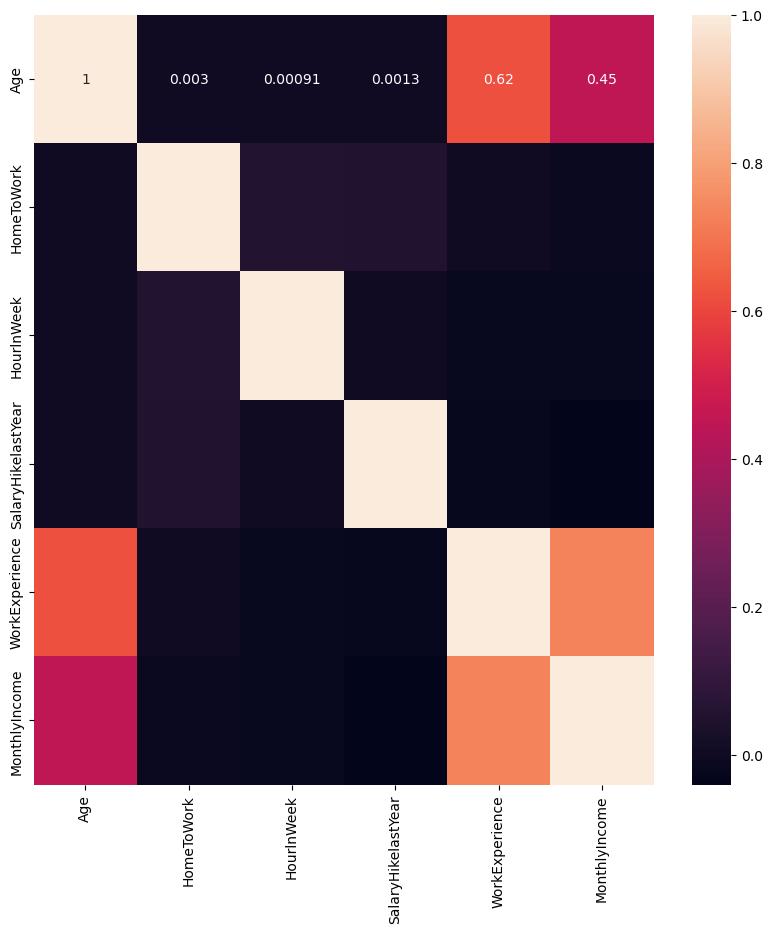

In [33]:
fig = plt.figure(figsize=(10,10))

sns.heatmap((train_data[numerical_features]).corr(),annot=True)

In [34]:
train_y = train_data[target]
train_data.drop(target,axis=1,inplace=True)

In [35]:
train_df_copy = train_data.copy()
test_df_copy= test_data.copy()

In [36]:
to_drop = ['MonthlyIncome','Age'] # based on correlation matrix and heatmap
train_df_copy.drop(to_drop,axis=1,inplace=True)
test_df_copy.drop(to_drop,axis=1,inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder,StandardScaler

In [38]:
ordinal_trf = ('TravelProfile|Designation',OrdinalEncoder(categories=[['No','Rarely','Yes'],
                                                                      ["Executive", "Manager", "Senior Manager", "AVP", "VP"]]),[
    'TravelProfile','Designation'])


In [39]:
OneHot_trf = ('Department|EducationField|Gender|MaritalStatus',OneHotEncoder(sparse_output=False,drop='first'),['Department','EducationField','Gender','MaritalStatus'])

In [40]:
print("No. of Feature after transforming: ",train_df_copy.shape[1]
      +len(train_df_copy['Department'].value_counts())-2 +   
      len(train_df_copy['EducationField'].value_counts())-2 +
      len(train_df_copy['Gender'].value_counts())-2  + 
      len(train_df_copy['MaritalStatus'].value_counts())-2)

No. of Feature after transforming:  24


In [41]:
train_df_copy.shape

(5180, 18)

In [42]:
transformer_preprocess = ColumnTransformer(transformers=[
    ordinal_trf,
    OneHot_trf
],remainder='passthrough')
transformer_scale = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,24))
])

In [43]:
pipe = Pipeline([
    ('Preprocess',transformer_preprocess),
    ('Scaler',transformer_scale)

    
])
pipe

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TravelProfile|Designation',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Rarely',
                                                                              'Yes'],
                                                                             ['Executive',
                                                                              'Manager',
                                                                              'Senior '
                                                                              'Manager',
                                                                              'AVP',
                                                                              'VP']]),
                                                  ['TravelProfile',
                                                   'Designation']),
                                                 ('Department|EducationField|Gender|MaritalStatus',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Department',
                                                   'EducationField', 'Gender',
                                                   'MaritalStatus'])])),
                ('Scaler',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 24, None))]))])

In [44]:
transformed_train_df = pipe.fit_transform(train_df_copy)
transformed_test_df = pipe.transform(test_df_copy)

In [45]:
transformed_train_df

array([[-2.01708349e-01, -9.10760655e-01, -2.11603685e-01, ...,
        -5.35141247e-01, -1.65314350e-01, -9.35609481e-01],
       [ 1.66743163e+00, -9.10760655e-01, -2.11603685e-01, ...,
        -9.20556039e-01, -4.76141331e-01,  9.94700606e-01],
       [-2.01708349e-01,  3.88459372e-03, -2.11603685e-01, ...,
         1.07216741e-01, -4.76141331e-01, -3.84092313e-01],
       ...,
       [-2.01708349e-01, -9.10760655e-01, -2.11603685e-01, ...,
        -4.06669649e-01, -7.86968313e-01, -3.84092313e-01],
       [-2.01708349e-01, -9.10760655e-01,  4.72581563e+00, ...,
        -4.06669649e-01,  7.67166594e-01,  7.18942022e-01],
       [ 1.66743163e+00, -9.10760655e-01, -2.11603685e-01, ...,
        -1.30597083e+00, -7.86968313e-01, -1.21136807e+00]])

In [46]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy='minority')

over_train_x,over_train_y  = over.fit_resample(transformed_train_df,train_y)

In [47]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(over_train_x,over_train_y,random_state=101)

In [48]:
logit_model = LogisticRegression()
logit_model.fit(Xtrain,Ytrain)
y_pred =logit_model.predict(Xtest)

print(classification_report(Ytest,y_pred))


              precision    recall  f1-score   support

           0       0.74      0.75      0.74       929
           1       0.75      0.74      0.74       939

    accuracy                           0.74      1868
   macro avg       0.74      0.74      0.74      1868
weighted avg       0.74      0.74      0.74      1868



In [49]:
print(cross_val_score(LogisticRegression(),Xtrain,Ytrain,cv=5))


[0.75468332 0.73416592 0.74732143 0.725      0.75446429]


In [50]:
tree = DecisionTreeClassifier()
tree.fit(Xtrain,Ytrain)
ypred=tree.predict(Xtest)

print(classification_report(Ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       929
           1       0.95      1.00      0.97       939

    accuracy                           0.97      1868
   macro avg       0.97      0.97      0.97      1868
weighted avg       0.97      0.97      0.97      1868



In [51]:
forest = RandomForestClassifier(max_depth=11)
forest.fit(Xtrain,Ytrain)
yPred =forest.predict(Xtest)

print(classification_report(Ytest,yPred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       929
           1       0.97      0.99      0.98       939

    accuracy                           0.98      1868
   macro avg       0.98      0.98      0.98      1868
weighted avg       0.98      0.98      0.98      1868



In [52]:
xgb = XGBClassifier(max_depth=11, use_label_encoder=False, eval_metric='logloss')
xgb.fit(Xtrain, Ytrain)

yPred1 = xgb.predict(Xtest)
print(classification_report(Ytest,yPred1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       929
           1       0.99      1.00      0.99       939

    accuracy                           0.99      1868
   macro avg       0.99      0.99      0.99      1868
weighted avg       0.99      0.99      0.99      1868



In [53]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 9, 11, 13],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

xgb = XGBClassifier(max_depth=11, use_label_encoder=False, eval_metric='logloss')
grid = RandomizedSearchCV(xgb, params, cv=5, scoring='f1_weighted', n_iter=20, n_jobs=-1)
grid.fit(Xtrain, Ytrain)

best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:11:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:11:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:11:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:11:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Best Params: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 13, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [54]:
yPred2 = best_model.predict(Xtest)
print(classification_report(Ytest,yPred2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       929
           1       0.98      1.00      0.99       939

    accuracy                           0.99      1868
   macro avg       0.99      0.99      0.99      1868
weighted avg       0.99      0.99      0.99      1868



In [55]:
from  catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose=0)
cat.fit(Xtrain, Ytrain)
y_pred = cat.predict(Xtest)

print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       929
           1       0.98      1.00      0.99       939

    accuracy                           0.99      1868
   macro avg       0.99      0.99      0.99      1868
weighted avg       0.99      0.99      0.99      1868



In [56]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

voting = VotingClassifier(
    estimators=[
        ('xgb', best_model),
        ('rf', RandomForestClassifier()),
        ('lr', LogisticRegression(max_iter=1000))
    ],
    voting='soft'
)

voting.fit(Xtrain, Ytrain)
y_pred_voting = voting.predict(Xtest)

print(classification_report(Ytest, y_pred_voting))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       929
           1       0.97      1.00      0.99       939

    accuracy                           0.99      1868
   macro avg       0.99      0.98      0.99      1868
weighted avg       0.99      0.99      0.99      1868



In [57]:
sub = pd.DataFrame({'EmployeeID':ids,'Attrition':best_model.predict(transformed_test_df)})

In [58]:
sub

,EmployeeID,Attrition
0,6110001,1
1,6110002,1
2,6110003,0
3,6110004,1
4,6110005,0
...,...,...
2625,6112626,0
2626,6112627,0
2627,6112628,0
2628,6112629,1


In [59]:
sub.to_csv('submittion.csv',index=False)